In [41]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import datetime
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.cluster.vq import kmeans, kmeans2
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import fastcluster

In [37]:
import Comet_Removal
%run Comet_Removal

In [38]:
def standardization(x):
    x_bar = np.mean(x)
    s = np.std(x)
    x_z = (x - x_bar) / s
    return(x_z)
data_stnd = data
data_stnd.iloc[:,2:8]= data.iloc[:,2:8].apply(standardization, broadcast = True)
data_stnd.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,-0.402246,-0.768113,-0.182201,0.278564,0.070213,-1.059432,Y,Apollo
1,419624 (2010 SO16),09/17/2010,0.124860,-0.810632,0.185133,-0.722908,-0.346462,-0.696463,Y,Apollo
2,414772 (2010 OC103),07/28/2010,-0.863463,1.042010,-2.018870,-0.433174,-0.304249,-0.056236,N,Apollo
3,414746 (2010 EH20),03/06/2010,-1.522345,0.647185,1.491208,0.193533,0.094723,0.001898,N,Amor
4,407324 (2010 OB101),07/18/2010,0.256636,-0.306470,-0.467905,-0.288307,-0.202123,-1.098934,N,Apollo


#PCA

In [29]:
pca_df = data_stnd.iloc[:,2:8]
pca_df.head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg)
0,-0.402246,-0.768113,-0.182201,0.278564,0.070213,-1.059432
1,0.124860,-0.810632,0.185133,-0.722908,-0.346462,-0.696463
2,-0.863463,1.042010,-2.018870,-0.433174,-0.304249,-0.056236
3,-1.522345,0.647185,1.491208,0.193533,0.094723,0.001898
4,0.256636,-0.306470,-0.467905,-0.288307,-0.202123,-1.098934


In [31]:
RR = pca_df.corr()
eigen_RR = np.linalg.eig(RR)
print(eigen_RR[0] / sum(eigen_RR[0]))
PCs = np.dot(pca_df, eigen_RR[1][:, :2])
PC1 = PCs[:, 0]
PC2 = PCs[:, 1]

[ 0.50011939  0.20566159  0.15284768  0.08568378  0.0512964   0.00439117]


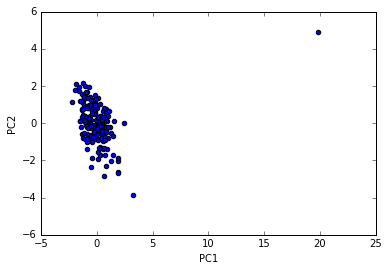

In [33]:
pp.scatter(PC1, PC2)
pp.xlabel('PC1')
pp.ylabel('PC2')

#Cluster Analysis

In [39]:
df = data_stnd.iloc[:,2:8]
df.head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg)
0,-0.402246,-0.768113,-0.182201,0.278564,0.070213,-1.059432
1,0.124860,-0.810632,0.185133,-0.722908,-0.346462,-0.696463
2,-0.863463,1.042010,-2.018870,-0.433174,-0.304249,-0.056236
3,-1.522345,0.647185,1.491208,0.193533,0.094723,0.001898
4,0.256636,-0.306470,-0.467905,-0.288307,-0.202123,-1.098934


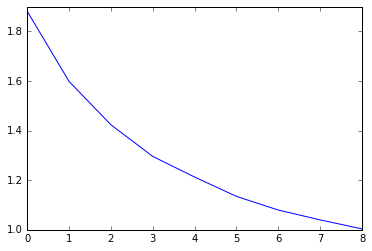

In [42]:
score = []
cluster_array = [kmeans(df, i) for i in range(1,10)]
pp.plot([var for (array,var) in cluster_array])
pp.show()

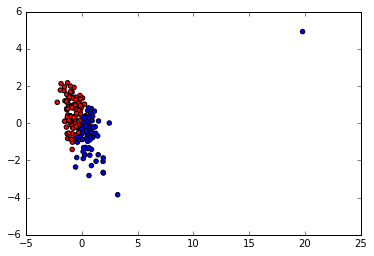

In [43]:
kmeans2(df, 2)
pp.scatter(PCs[:, 0], PCs[:, 1], c = kmeans2(df,2)[1], cmap = 'bwr')

In [52]:
Z = fastcluster.linkage(df, method='single', metric='euclidean', preserve_input='True')

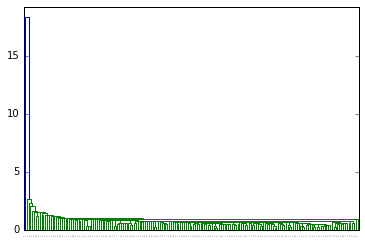

In [53]:
pp.figure()
dendrogram(Z,==leaf_rotation=90, leaf_font_size=1)
pp.show()